# Experiment 1: UNet model can do segmentation on smalle dataset

## Preprocessing

### Original dataset

Original image and segmentation


Text(0.5, 0, 'image label')

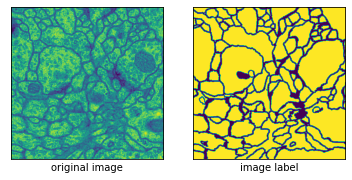

In [3]:
# read images and labels
# transfer png to nifti file; if not need to save, keep save_nii=False
from DataFunctions import * # function generate nifti file from images, writen by us
import matplotlib.pylab as plt
# save original training set
image_original = img2nii('./data_aug/membrane/train/image0/',save_nii=True,
                 image_prefix='.',save_name = 'training_original',
                save_path='./data_aug/')
label_original = img2nii('./data_aug/membrane/train/label0/',save_nii=True,
                 image_prefix='.',save_name = 'label_original',
                save_path='./data_aug/')
# show original image and segmentation
print('Original image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Test data preprocessing

In [4]:
# save original test set
test_original = img2nii('./data_aug/membrane/test/',save_nii=False,
                 image_prefix='.',save_name = 'test_original',
                save_path='./data_aug/')
test_label_original = img2nii('./data_aug/membrane/test_label/',save_nii=False,
                 image_prefix='.',save_name = 'test_label_original',
                save_path='./data_aug/')

from scipy.ndimage import zoom
test_norm = zoom(test_original, (388/512, 388/512, 1),mode='nearest')/255
array_input = test_norm
array2nii(array_input,'test_norm','./data_aug/')

test_label_norm = zoom(test_label_original, (388/512, 388/512, 1),mode='nearest')/255
test_label_norm[test_label_norm>0.5] = 1
test_label_norm[test_label_norm<=0.5] = 0
array_input = test_label_norm
array2nii(array_input,'test_label_norm','./data_aug/')

### Training data preprocessing

In [5]:
# save original test set
train_original = img2nii('./data_aug/membrane/train/image/',save_nii=False,
                 image_prefix='.',save_name = 'train_original',
                save_path='./data_aug/')
train_label_original = img2nii('./data_aug/membrane/train/label/',save_nii=False,
                 image_prefix='.',save_name = 'train_label_original',
                save_path='./data_aug/')

from scipy.ndimage import zoom
train_norm = zoom(train_original, (388/512, 388/512, 1),mode='nearest')/255
array_input = train_norm
array2nii(array_input,'train_norm_without_aug','./data_aug/')

train_label_norm = zoom(train_label_original, (388/512, 388/512, 1),mode='nearest')/255
train_label_norm[train_label_norm>0.5] = 1
train_label_norm[train_label_norm<=0.5] = 0
array_input = train_label_norm
array2nii(array_input,'train_label_norm_without_norm','./data_aug/')

## UNet model in the paper

### UNet model constructions
* See functions in DataFunctions.py

## UNet training and prediction

In [6]:
from UNet2D import *
model = UNet2d()
model_checkpoint = ModelCheckpoint('unet_membrane_without_aug.hdf5', monitor='loss',verbose=1,
                                   save_best_only=True)
imgs_train = train_norm.swapaxes(1,2).swapaxes(0,1)
imgs_mask = train_label_norm.swapaxes(1,2).swapaxes(0,1)
model.fit(imgs_train, imgs_mask, batch_size=10, epochs=5, verbose=1,validation_split=0.2,
          shuffle=True, callbacks=[model_checkpoint])

2022-04-25 23:23:13.815276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erjun/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-25 23:23:13.815290: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-25 23:23:14.783307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 23:23:14.784187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erjun/miniconda3/lib/python3.8/site-packages/cv2/../

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad (TFOpLambda)  (None, 572, 572, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 570, 570, 64  640         ['tf.compat.v1.pad[0][0]']       
                                )                                                                 
                                                                                               

                                8)                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 196, 196, 12  147584      ['conv2d_14[0][0]']              
                                8)                                                                
                                                                                                  
 center_crop (CenterCrop)       (None, 392, 392, 64  0           ['conv2d_1[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 392, 392, 64  32832      ['conv2d_15[0][0]']              
 spose)                         )                                                                 
          

## Prediction

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad_1 (TFOpLambda  (None, 572, 572, 1)  0          ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 570, 570, 64  640         ['tf.compat.v1.pad_1[0][0]']     
                                )                                                              

 conv2d_33 (Conv2D)             (None, 198, 198, 12  295040      ['concatenate_6[0][0]']          
                                8)                                                                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 196, 196, 12  147584      ['conv2d_33[0][0]']              
                                8)                                                                
                                                                                                  
 center_crop_5 (CenterCrop)     (None, 392, 392, 64  0           ['conv2d_20[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_7 (Conv2DTran  (None, 392, 392, 64  32832      ['conv2d_34[0][0]']              
 spose)   

/tmp/ipykernel_649730/1748736463.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(test_input,30,verbose=1)
2022-04-25 23:26:23.571718: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: UNet/center_crop_5/cond/branch_executed/_39


30/30 [==============================] - 6s 159ms/step


Text(0.5, 0, 'image label')

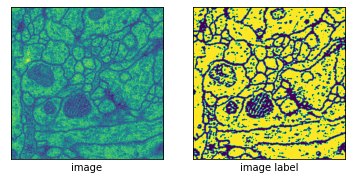

In [7]:
# prediction
model = UNet2d()
model.load_weights('unet_membrane_without_aug.hdf5')
test_input = test_norm.swapaxes(1,2).swapaxes(0,1)
results = model.predict_generator(test_input,30,verbose=1)
# save results
prediction = np.squeeze(results).swapaxes(0,1).swapaxes(1,2)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
array2nii(prediction,'test_prediction_without_aug','./data_aug/')
# show prediction
plt.figure()
plt.subplot(121)
plt.imshow(test_norm[:,:,1])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(prediction[:,:,1])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

In [8]:
import keras.backend as K
from sklearn.metrics import accuracy_score
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [9]:
Dice_score = dice_coef(test_label_norm.astype(np.float32),prediction)
accuracy = accuracy_score(test_label_norm.astype(np.float32).flatten(),prediction.flatten())

print('Dice_score: ',Dice_score.numpy())
print('Accuracy: ',accuracy)

Dice_score:  0.8739626
Accuracy:  0.8140292686671154
